# PyCHO Geopandas Workshop

In [1]:
import pandas as pd
import geopandas as gpd
import descartes
import contextily
import matplotlib.pyplot as plt
import folium

# Open Police Data

[OpenPoliceData](https://github.com/openpolicedata/openpolicedata) is a Python package that provides easy access to 282 (and growing) incident-level open datasets from police departments around the United States. Datasets include traffic stops, use of force, officer-involved shootings, complaints, and other types of police interactions.

Users request data by department name and type of data. The data is returned as a pandas DataFrame. There is no need to manually find the data online or make API calls. 

In [2]:
import openpolicedata as opd

In [3]:
# Get The number of unique datasets (unique state, source, agency, and table type)
print(f"The OPD package has: ")
print(f"• {opd.datasets.num_unique()} unique datasets")
# Find how many datasets are available for full states and how many are available for individual agencies
print(f"• {opd.datasets.num_sources(full_states_only=True)} datasets for all agencies in a state")
print(f"• {opd.datasets.num_sources()-opd.datasets.num_sources(full_states_only=True)} datasets for individual agencies")
# Find number of datasets from each state
opd.datasets.summary_by_state().head(10)

The OPD package has: 
• 365 unique datasets
• 8 datasets for all agencies in a state
• 149 datasets for individual agencies


,Total
State,
California,
All State Agencies,1
Individual Agency,53
North Carolina,
All State Agencies,1
Individual Agency,22
Texas,23
New York,20
Arizona,18


In [4]:
data = opd.Source(source_name="Fairfax County")
data.datasets

,State,SourceName,Agency,AgencyFull,TableType,coverage_start,coverage_end,last_coverage_check,Description,source_url,readme,URL,Year,DataType,date_field,dataset_id,agency_field,min_version
835,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2016-01-01,2016-12-31,07/07/2023,<NA>,NaN,<NA>,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,2016,ArcGIS,<NA>,<NA>,<NA>,0.2
836,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2017-01-01,2017-12-31,07/07/2023,<NA>,NaN,<NA>,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,2017,ArcGIS,<NA>,<NA>,<NA>,0.2
837,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2018-01-01,2018-12-31,07/07/2023,<NA>,NaN,<NA>,https://services9.arcgis.com/kYvfX7YK8OobHItA/...,2018,ArcGIS,<NA>,<NA>,<NA>,0.2
838,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2019-01-01,2019-12-31,07/07/2023,<NA>,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2019,CSV,<NA>,<NA>,<NA>,0.3.1
839,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2020-01-01,2020-12-31,07/07/2023,<NA>,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2020,CSV,<NA>,<NA>,<NA>,0.3.1
840,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2021-01-01,2021-12-31,07/07/2023,<NA>,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2021,CSV,<NA>,<NA>,<NA>,0.3.1
841,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,ARRESTS,2022-01-01,2022-12-31,07/07/2023,<NA>,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2022,CSV,<NA>,<NA>,<NA>,0.3.1
842,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,TRAFFIC CITATIONS,2019-01-01,2019-12-31,07/07/2023,Traffic Citations issued by Fairfax County Police,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2019,CSV,<NA>,<NA>,<NA>,0.3.1
843,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,TRAFFIC CITATIONS,2020-01-01,2020-12-31,07/07/2023,Traffic Citations issued by Fairfax County Police,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2020,CSV,<NA>,<NA>,<NA>,0.3.1
844,Virginia,Fairfax County,Fairfax County,Fairfax County Police Department,TRAFFIC CITATIONS,2021-01-01,2021-12-31,07/07/2023,Citations issued within 2021. Data was collect...,https://www.fcpod.org/pages/crime-data,<NA>,https://www.fairfaxcounty.gov/police/sites/pol...,2021,CSV,<NA>,<NA>,<NA>,0.3.1


In [5]:

agencies_fairfax_county = data.get_agencies(table_type="TRAFFIC CITATIONS", year=2021)
print(agencies_fairfax_county)


['Fairfax County']


<b>Just to give you a preview, the table object for each agency's dataset looks like this.</b>

We are getting traffic stops from the dataset. This is the 'table_type='STOPS' part

In [6]:
agency = "Fairfax County"
table = data.load_from_url(year=2021, table_type='TRAFFIC CITATIONS', agency=agency)
print(table)

state: Virginia,
source_name: Fairfax County,
agency: Fairfax County,
table_type: TableType.TRAFFIC_CITATIONS,
year: 2021,
description: Citations issued within 2021. Data was collected from Fairfax County Police Record Management System (RMS).,
url: https://www.fairfaxcounty.gov/police/sites/police/files/Assets/ArcGIS/FCPoD_Site/2021_Citation_Data.zip


In [7]:
print(type(table))
print(table.table.columns.tolist())

<class 'openpolicedata.data.Table'>
['Object ID', 'Citation ID', 'Citation Date', 'Citation Time', 'Charge', 'Race', 'Sex', 'Ethnicity', 'Residence', 'Officer ID', 'Officer Sex', 'Officer Race', 'Location', 'Subdivision', 'Citations Notes', 'X Corrdinate', 'Y Coordinate', 'Road 1', 'Road 2', 'Patrol Area', 'Station Number', 'Station Name', 'Idenitifer', 'District 1', 'Web Address', 'BOS Name', 'Year']


<b>To give another example of the table inside this table object, it is a pandas dataframe!</b>

In [8]:
fairfax_county_df = table.table
print(type(fairfax_county_df))
print(f"{fairfax_county_df.iloc[0]}")

<class 'pandas.core.frame.DataFrame'>
Object ID                                       579277
Citation ID                                 C160752018
Citation Date                                 6/2/2021
Citation Time                                     1859
Charge             TRAFFIC:FAIL TO OBEY TRAFFIC LIGHTS
Race                                                 W
Sex                                                  F
Ethnicity                                            H
Residence                                          NaN
Officer ID                                      353576
Officer Sex                                          F
Officer Race                                          
Location                                             0
Subdivision                                          0
Citations Notes                                      0
X Corrdinate                                11855976.0
Y Coordinate                                 6997321.5
Road 1                     

## County of Fairfax 

[From Fairfax County](https://www.fairfaxcounty.gov/maps)

In [9]:
# this is the relative path to where the GIS data is stored
# To get the Fairfax county GIS data go to https://www.fairfaxcounty.gov/maps/gis-geodata
# For Fairfax Country boundaries go to https://www.fairfaxcounty.gov/maps/open-geospatial-data and select "Boundaries" Then select "County Boundary" or the shortcut is https://data-fairfaxcountygis.opendata.arcgis.com/maps/county-border
# For Fairfax County roadway data go to https://www.fairfaxcounty.gov/maps/open-geospatial-data and select "Transportation" Then select "Roadway Centerlines" or the shortcut is https://data-fairfaxcountygis.opendata.arcgis.com/maps/roadway-centerlines
my_path = './GIS_Data'  

# find this code in geopanda docs: https://geopandas.org/en/stable/gallery/plotting_basemap_background.html?highlight=basemap
fairfax_county_boundary = gpd.read_file(my_path + "/city_boundaries/Fairfax_County_Boundary.geojson")
fairfax_county_boundary = fairfax_county_boundary.to_crs(epsg=4326)

print(f"Total bounds {fairfax_county_boundary.total_bounds}")
fairfax_county_boundary.crs

Total bounds [-77.5370145   38.60395841 -77.0413628   39.05768593]


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
from shapely.geometry import Point
# Create a list points to be used for the plotting example
# assuming fairfax_county_df is your GeoDataFrame. Note currently 'X Corrdinate' is misspelled in the dataset
coordinates_list = list(zip(fairfax_county_df['X Corrdinate'], fairfax_county_df['Y Coordinate']))


# This WILL TAKE A LONG TIME 
# We need to convert the coordinates from the virginia state plane to latitude and longitude
# This reference https://law.lis.virginia.gov/vacodefull/title1/chapter6/ describes the Virginia State Plane North (NAD83) projection
# The Virginia State Plane is referenced as EPSG:2283 NAD83 / Virginia North (ftUS) in https://epsg.io/2283

# ====================================================================================================
# This commented code is an optional way to convert the coordinates from the virginia state plane to latitude and longitude, but we will use a different method below
# This way is just documented as an alternative option
# from pyproj import CRS, Transformer
# # Virginia State Plane North (NAD83)
# state_plane = CRS("EPSG:3968")
# # WGS84 (longitude and latitude)
# wgs84 = CRS("EPSG:4326")
# transformer = Transformer.from_crs(state_plane, wgs84)
# longitude, latitude = transformer.transform(11855976.0, 6997321.5)
# print(f"longitude={longitude}, latitude={latitude}") 
# ====================================================================================================

# This code will convert the coordinates from the virginia from the dataset to latitude and longitude
coordinates_list = [list(tup) for tup in coordinates_list]
points=[]
icount=0
for tup in coordinates_list:
    icount+=1
    if icount%5000==0:
        print(f"icount={icount} len(coordinates_list)={len(coordinates_list)}")

    point_lat_long=gpd.GeoDataFrame([{'geometry': Point(tup[0], tup[1]), 'name': ''}], crs="EPSG:2283").to_crs(epsg=4326).iloc[0]['geometry']
    points.append([point_lat_long.y, point_lat_long.x])
    
# If you want to save the points to a file uncomment the following two lines
# import json
# with open('points.json', 'w') as f:
#     json.dump(points, f)

# This is the code to read the points from a file which would need to go above the processing code above
# with open('output.json', 'r') as f:
#    data = json.load(f)



icount=5000 len(coordinates_list)=36767
icount=10000 len(coordinates_list)=36767
icount=15000 len(coordinates_list)=36767
icount=20000 len(coordinates_list)=36767
icount=25000 len(coordinates_list)=36767
icount=30000 len(coordinates_list)=36767
icount=35000 len(coordinates_list)=36767


### Add a basemap

Text(204.1041936937142, 0.5, 'Latitude')

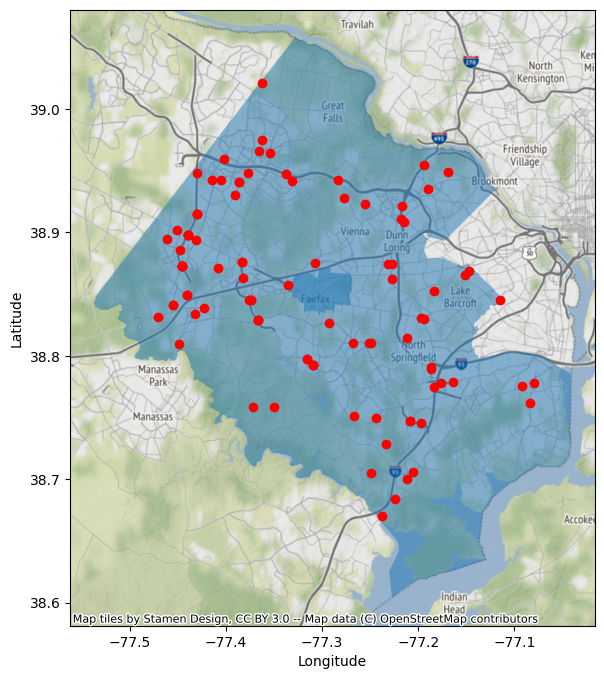

In [12]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import random

ax = fairfax_county_boundary.plot(figsize=(10,8), alpha=0.5)
contextily.add_basemap(ax, crs=fairfax_county_boundary.crs)

# Plot the points
N = len(points)
k = min(100, N)
selection_index_list = random.sample(range(N), k)

for selection_index in selection_index_list:
    point = gpd.GeoDataFrame([{'geometry': Point(points[selection_index][1], points[selection_index][0]), 'name': ''}], crs="EPSG:4326")
    point.plot(color='red', ax=ax)
# Add labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")



# Folium - Leaflet.js for python!

If anyone here ever uses Javascript, you might be familiar with the mapping library, [Leaflet](https://leafletjs.com/).

[Folium](https://python-visualization.github.io/folium/) is another python mapping library built on top of Leaflet. Now, we can make really nice web maps with python instead of Javascript! The strength of folium is in its mapping capabilities. This is not a data manipulation library in the way that GeopPandas is.

In [13]:
from folium import plugins
bounds = fairfax_county_boundary.total_bounds
lon_center = (bounds[0] + bounds[2]) / 2
lat_center = (bounds[1] + bounds[3]) / 2

# Create folium map centered at the center of the bounds
m = folium.Map(location=[lat_center, lon_center], zoom_start=11)
plugins.HeatMap(points, radius = 4, blur = 1).add_to(m)
m

In [14]:
# As a miscellaneous example, here is how to geocode an address
from geopy.geocoders import Nominatim

# To use Nomatim you need to specify a user agent that identifies your application otherwise you will get an error
geolocator = Nominatim(user_agent="openpolicedata")

def geocode_address(geolocator, address):
    location = geolocator.geocode(address)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

address = "2600 ELON DR,Virginia Beach,VA"  # Replace with your address
lat, lon = geocode_address(geolocator, address)
print(lat, lon)

36.8339905 -76.05963041181948
